# COVID-19

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('ggplot')
import seaborn as sns
from matplotlib.gridspec import GridSpec

import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option('plotting.backend', 'pandas_bokeh')

import warnings
warnings.filterwarnings("ignore")

Loading BokehJS ...

In [11]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/time-series-19-covid-combined.csv'
df = pd.read_csv(url)
df.rename(columns={'Country/Region':'Country'},inplace=True)
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths
0,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,0,0
1,Anhui,Mainland China,31.8257,117.2264,2020-01-23,9,0,0
2,Anhui,Mainland China,31.8257,117.2264,2020-01-24,15,0,0
3,Anhui,Mainland China,31.8257,117.2264,2020-01-25,39,0,0
4,Anhui,Mainland China,31.8257,117.2264,2020-01-26,60,0,0


In [12]:
country_codes = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
country_codes.rename(columns={'COUNTRY':'Country','CODE':'Code'},inplace=True)
country_codes.drop(columns='GDP (BILLIONS)',inplace=True)
country_codes.head()

,Country,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [13]:
df = df.fillna('unknow')
df['Country'] = df['Country'].str.replace('US','United States')
df['Country'] = df['Country'].str.replace('UK','United Kingdom') 
df['Country'] = df['Country'].str.replace('Mainland China','China')
df['Country'] = df['Country'].str.replace('South Korea','Korea, South')
df['Country'] = df['Country'].str.replace('North Korea','Korea, North')
df['Country'] = df['Country'].str.replace('Macau','China')
df['Country'] = df['Country'].str.replace('Ivory Coast','Cote d\'Ivoire')
df = pd.merge(df,country_codes,on=['Country'])
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Recovered,Deaths,Code
0,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,CHN
1,Anhui,China,31.8257,117.2264,2020-01-23,9,0,0,CHN
2,Anhui,China,31.8257,117.2264,2020-01-24,15,0,0,CHN
3,Anhui,China,31.8257,117.2264,2020-01-25,39,0,0,CHN
4,Anhui,China,31.8257,117.2264,2020-01-26,60,0,0,CHN


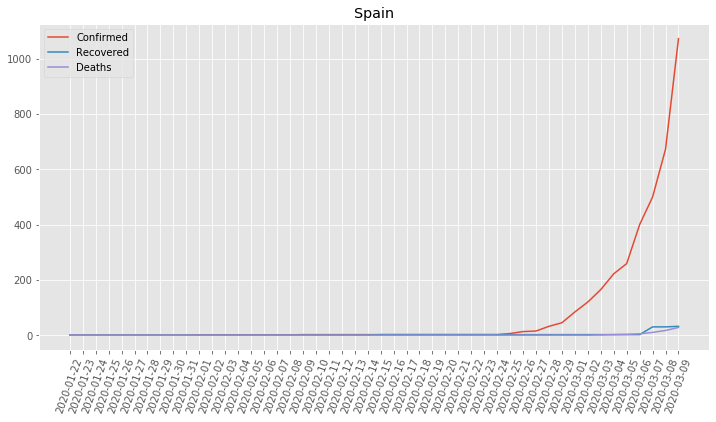

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df[df['Country'] == 'Spain']['Date'],df[df['Country'] == 'Spain']['Confirmed'],label='Confirmed')
plt.plot(df[df['Country'] == 'Spain']['Date'],df[df['Country'] == 'Spain']['Recovered'],label='Recovered')
plt.plot(df[df['Country'] == 'Spain']['Date'],df[df['Country'] == 'Spain']['Deaths'],label='Deaths')
plt.xticks(rotation=70)
plt.legend()
plt.title('Spain');

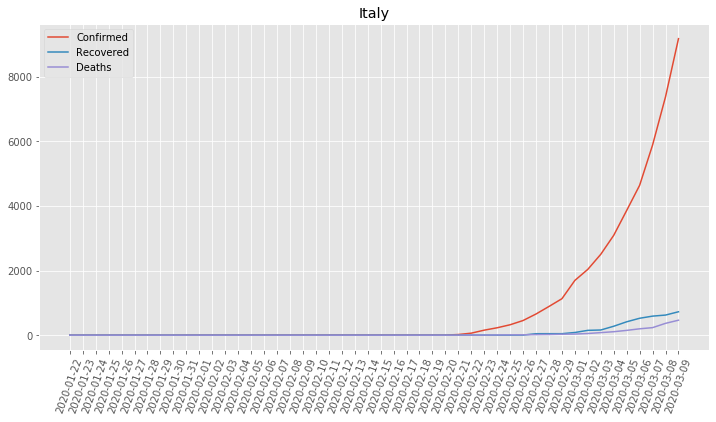

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df[df['Country'] == 'Italy']['Date'],df[df['Country'] == 'Italy']['Confirmed'],label='Confirmed')
plt.plot(df[df['Country'] == 'Italy']['Date'],df[df['Country'] == 'Italy']['Recovered'],label='Recovered')
plt.plot(df[df['Country'] == 'Italy']['Date'],df[df['Country'] == 'Italy']['Deaths'],label='Deaths')
plt.xticks(rotation=70)
plt.legend()
plt.title('Italy');

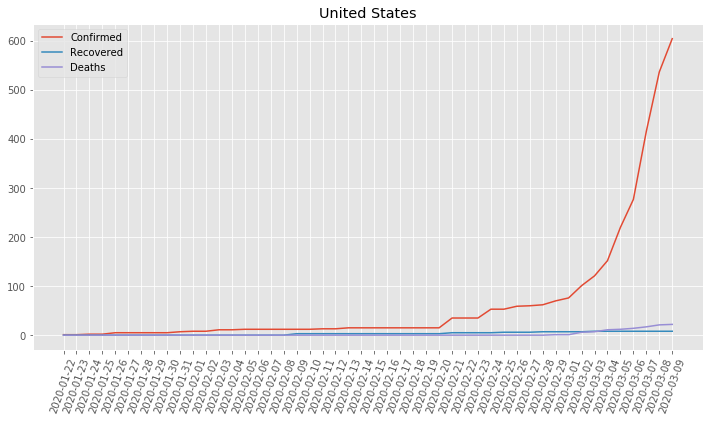

In [16]:
us = df[df['Country'] == 'United States'].groupby('Date')[['Confirmed','Recovered','Deaths']].agg('sum')
plt.figure(figsize=(12,6))
plt.plot(us.index,us['Confirmed'],label='Confirmed')
plt.plot(us.index,us['Recovered'],label='Recovered')
plt.plot(us.index,us['Deaths'],label='Deaths')
plt.xticks(rotation=70)
plt.legend()
plt.title('United States');

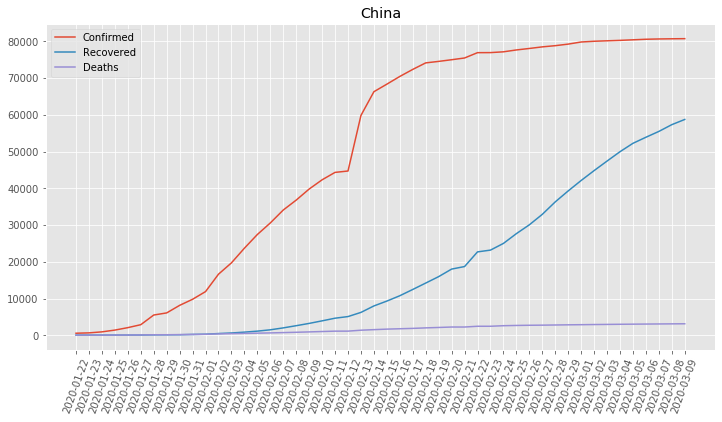

In [17]:
china = df[df['Country'] == 'China'].groupby('Date')[['Confirmed','Recovered','Deaths']].agg('sum')
plt.figure(figsize=(12,6))
plt.plot(china.index,china['Confirmed'],label='Confirmed')
plt.plot(china.index,china['Recovered'],label='Recovered')
plt.plot(china.index,china['Deaths'],label='Deaths')
plt.xticks(rotation=70)
plt.legend()
plt.title('China');

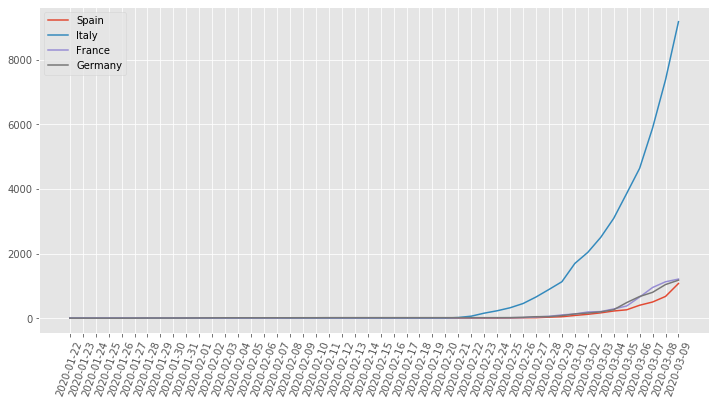

In [18]:
countries = ['Spain','Italy','France','Germany']
plt.figure(figsize=(12,6))
for i in countries:
    plt.plot(df[df['Country'] == i]['Date'],df[df['Country'] == i]['Confirmed'],label=i)
plt.xticks(rotation=70)
plt.legend();

## TORP COVID-19 

In [19]:
df_country = df.loc[df['Date'] == df['Date'].iloc[-1]].groupby('Country')[['Confirmed','Recovered','Deaths']].agg('sum')

In [20]:
top_list = df_country.sort_values(by='Confirmed',ascending=False)[:10].index.tolist()

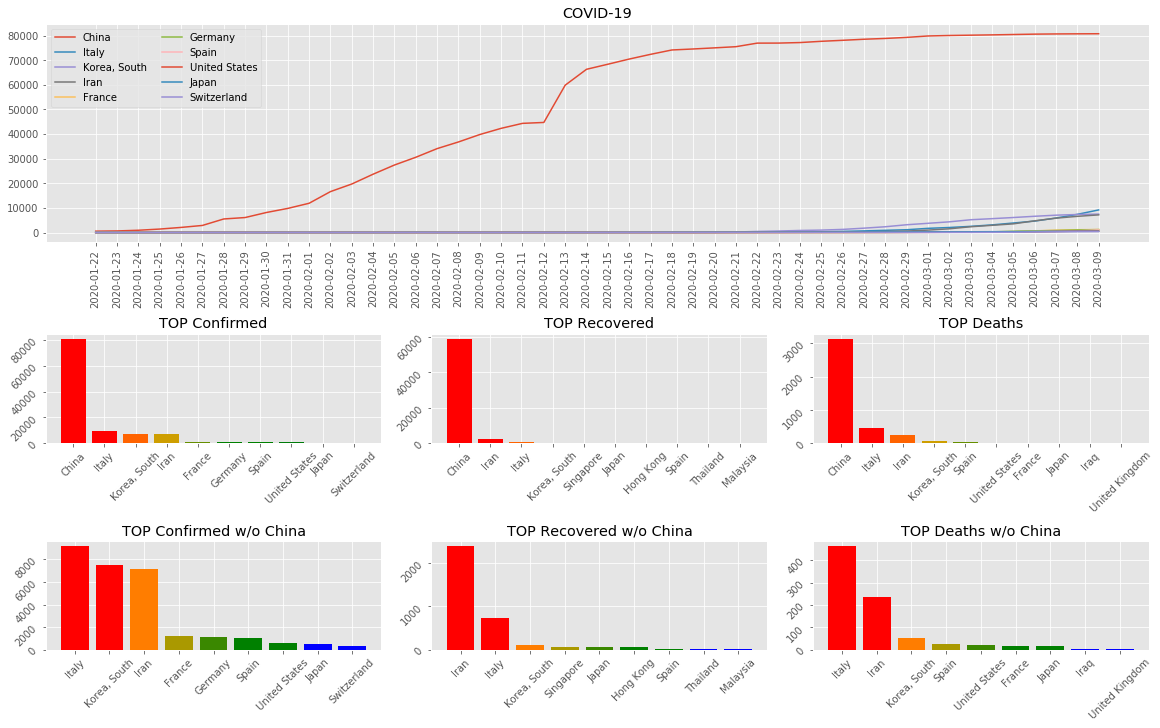

In [24]:


fig = plt.figure(figsize=(16,10),constrained_layout=True)
#fig.suptitle("COVID-19",fontsize=20)

gs = GridSpec(4, 3, figure=fig)
ax1 = fig.add_subplot(gs[:2, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[2, :1])
ax3 = fig.add_subplot(gs[2, 1:2])
ax4 = fig.add_subplot(gs[2, -1])
ax5 = fig.add_subplot(gs[3, :1])
ax6 = fig.add_subplot(gs[3, 1:2])
ax7 = fig.add_subplot(gs[3, -1])

# Axis 1
for i in top_list:

    ax1.plot(df[df['Country'] == i].groupby('Date')[['Confirmed','Recovered','Deaths']].agg('sum').index,df[df['Country'] == i].groupby('Date')[['Confirmed','Recovered','Deaths']].agg('sum')['Confirmed'],label=i)

ax1.tick_params(axis='x',labelrotation=90)
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1, 0.20, 0),mode="expand",ncol=2)
ax1.set_title('COVID-19')

# Axis 2, 5
clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"), 
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)

N1 = 10
N2 = 9

x1 = np.arange(N1).astype(float)
x2 = np.arange(N2).astype(float)
y1 = np.random.uniform(0, 5, size=(N1,))
y2 = np.random.uniform(0, 5, size=(N2,))

ax2.bar(df_country.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].index,df_country.sort_values(by='Confirmed',ascending=False)['Confirmed'][:10].values,color=rvb(x1/N1))
ax2.tick_params(labelrotation=45)
ax2.title.set_text('TOP Confirmed')


ax5.bar(df_country.sort_values(by='Confirmed',ascending=False)['Confirmed'][1:10].index,df_country.sort_values(by='Confirmed',ascending=False)['Confirmed'][1:10].values,color=rvb(x2/N2))
ax5.tick_params(labelrotation=45)
ax5.title.set_text('TOP Confirmed w/o China')

# Axis 3, 6

ax3.bar(df_country.sort_values(by='Recovered',ascending=False)['Recovered'][:10].index,df_country.sort_values(by='Recovered',ascending=False)['Recovered'][:10].values,color=rvb(x1/N1))
ax3.tick_params(labelrotation=45)
ax3.title.set_text('TOP Recovered')

ax6.bar(df_country.sort_values(by='Recovered',ascending=False)['Recovered'][1:10].index,df_country.sort_values(by='Recovered',ascending=False)['Recovered'][1:10].values,color=rvb(x2/N2))
ax6.tick_params(labelrotation=45)
ax6.title.set_text('TOP Recovered w/o China')

# Axis 4, 7

ax4.bar(df_country.sort_values(by='Deaths',ascending=False)['Deaths'][:10].index,df_country.sort_values(by='Deaths',ascending=False)['Deaths'][:10].values,color=rvb(x1/N1))
ax4.tick_params(labelrotation=45)
ax4.title.set_text('TOP Deaths')

ax7.bar(df_country.sort_values(by='Deaths',ascending=False)['Deaths'][1:10].index,df_country.sort_values(by='Deaths',ascending=False)['Deaths'][1:10].values,color=rvb(x2/N2))
ax7.tick_params(labelrotation=45)
ax7.title.set_text('TOP Deaths w/o China')
#format_axes(fig)

plt.show();

In [22]:
df[df['Country']=='Spain'][['Confirmed','Recovered','Deaths']].plot();